In [1]:
import torch
import evaluation
import MAML
import datasets
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# 2-modes

## Loading meta-learners

In [4]:
testdata = datasets.MultiModalClassification(100, 6, 100, 2)

folder = "trained_models/Classification/2_modes/"

vte = evaluation.load_metalearner(folder+"vte-maml/settings.json", testdata,
                                  folder+"vte-maml/model.pkl",
                                  folder+"vte-maml/modulation.pkl")

mmaml = evaluation.load_metalearner(folder+"mmaml/settings.json", testdata,
                                    folder+"mmaml/model.pkl",
                                    folder+"mmaml/modulation.pkl")

maml = evaluation.load_metalearner(folder+"maml/settings.json", testdata,
                                   folder+"maml/model.pkl")

## Benchmark Evaluation
### VTE-MAML

In [5]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(vte, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:15<00:00,  6.57it/s]


tensor(0.8592)
tensor(0.0013)
tensor(0.0388)
tensor(0.0022)
tensor(0.1259)
tensor(0.0082)


### Multimodal-MAML

In [6]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(mmaml, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:15<00:00,  6.58it/s]


tensor(0.8675)
tensor(0.0018)
tensor(0.0701)
tensor(0.0018)
tensor(0.2381)
tensor(0.0070)


### MAML

In [7]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(maml, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:06<00:00, 16.27it/s]


tensor(0.8510)
tensor(0.0020)
tensor(0.0227)
tensor(0.0014)
tensor(0.0780)
tensor(0.0080)


# 3-modes

## Loading meta-learners

In [8]:
testdata = datasets.MultiModalClassification(100, 6, 100, 3)

folder = "trained_models/Classification/3_modes/"

vte = evaluation.load_metalearner(folder+"vte-maml/settings.json", testdata,
                                  folder+"vte-maml/model.pkl",
                                  folder+"vte-maml/modulation.pkl")

mmaml = evaluation.load_metalearner(folder+"mmaml/settings.json", testdata,
                                    folder+"mmaml/model.pkl",
                                    folder+"mmaml/modulation.pkl")

maml = evaluation.load_metalearner(folder+"maml/settings.json", testdata,
                                   folder+"maml/model.pkl")

## Illustration of tasks

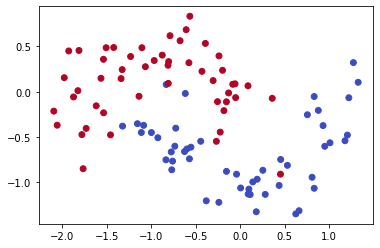

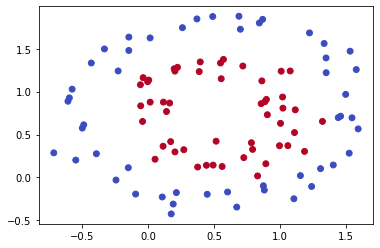

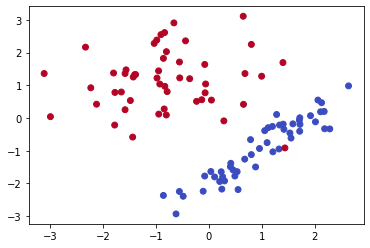

In [9]:
for i, task in enumerate(testdata):
    plt.scatter(task[1][:,0], task[1][:,1], c=task[3], s=35, cmap="coolwarm")
    plt.savefig("classif"+str(i)+".pdf", format="pdf")
    plt.show()
    if i == 2:
        break
plt.show()

## Benchmark Evaluation

### VTE-MAML

In [10]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(vte, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:15<00:00,  6.49it/s]


tensor(0.8384)
tensor(0.0034)
tensor(0.0418)
tensor(0.0020)
tensor(0.0981)
tensor(0.0098)


### Multimodal-MAML

In [11]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(mmaml, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:14<00:00,  6.82it/s]


tensor(0.8379)
tensor(0.0018)
tensor(0.1109)
tensor(0.0021)
tensor(0.4174)
tensor(0.0118)


### MAML

In [12]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(maml, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:06<00:00, 15.73it/s]


tensor(0.8256)
tensor(0.0034)
tensor(0.0510)
tensor(0.0019)
tensor(0.1430)
tensor(0.0109)


# Unseen mode

In [14]:
testdata = datasets.LinearClassification(100, 6, 100)

folder = "trained_models/Classification/2_modes/"

vte = evaluation.load_metalearner(folder+"vte-maml/settings.json", testdata,
                                  folder+"vte-maml/model.pkl",
                                  folder+"vte-maml/modulation.pkl")

mmaml = evaluation.load_metalearner(folder+"mmaml/settings.json", testdata,
                                    folder+"mmaml/model.pkl",
                                    folder+"mmaml/modulation.pkl")

maml = evaluation.load_metalearner(folder+"maml/settings.json", testdata,
                                   folder+"maml/model.pkl")

## Benchmark Evaluation

### VTE-MAML

In [15]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(vte, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:15<00:00,  6.38it/s]


tensor(0.7847)
tensor(0.0032)
tensor(0.1169)
tensor(0.0039)
tensor(0.3095)
tensor(0.0171)


### Multimodal-MAML

In [16]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(mmaml, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:15<00:00,  6.47it/s]


tensor(0.7556)
tensor(0.0041)
tensor(0.1440)
tensor(0.0041)
tensor(0.2550)
tensor(0.0124)


### MAML

In [17]:
acc, ece, mce = [], [], []
for i in range(10):
    a, e, m = evaluation.score(maml, testdata, 10, 10)
    acc.append(a)
    ece.append(e)
    mce.append(m)

acc = torch.Tensor(acc)
ece = torch.Tensor(ece)
mce = torch.Tensor(mce)

print(acc.mean())
print(acc.std()/10**0.5*1.96)
print(ece.mean())
print(ece.std()/10**0.5*1.96)
print(mce.mean())
print(mce.std()/10**0.5*1.96)

100%|██████████| 100/100 [00:06<00:00, 15.38it/s]


tensor(0.7671)
tensor(0.0034)
tensor(0.1447)
tensor(0.0029)
tensor(0.3383)
tensor(0.0091)


# Calibration plots

In [147]:
testdata = datasets.MultiModalClassification(800, 6, 100, 3)

def get_calibration_df(metalearner, testdata):
    score = 0
    final_preds = None
    targets = None

    for (x_s, x_q, y_s, y_q) in tqdm(testdata):
        predictions = None
        x_s, x_q, y_s, y_q = map(lambda x: x.to(metalearner.device), (x_s, x_q, y_s, y_q))
        for i in range(5):

            args = metalearner.finetune(x_s, y_s)
            with torch.no_grad():
                if type(args) == tuple:
                    pred = metalearner.predict(x_q, *args)
                else:
                    pred = metalearner.predict(x_q, args)
                if pred.shape[-1] > 1:
                    pred = torch.nn.Softmax(dim=-1)(pred)
                pred = pred.view(*pred.shape, 1)
                if predictions is None:
                    predictions = pred
                else:
                    predictions = torch.cat([predictions, pred], dim=2)

        final_pred = predictions.mean(dim=2)

        score += metalearner.get_accuracy(final_pred, y_q)
        if final_preds is None:
            final_preds = final_pred
            targets = y_q
        else:
            final_preds = torch.cat([final_preds, final_pred], dim=0)
            targets = torch.cat([targets, y_q], dim=0)

    final_preds = final_preds.sigmoid()
    print(final_preds.max())
    buckets = (final_preds * 10-0.01).abs().floor()/10
    print(buckets)
    results = pd.DataFrame([buckets.flatten().detach().numpy(), targets.flatten().detach().numpy()]).T
    results = pd.concat([results.groupby(0).mean(),results.groupby(0).count()], axis=1)
    results.columns = ["% positive", "number predicted"]
    return results

In [ ]:
df_vte = get_calibration_df(vte, testdata)

In [ ]:
df_mm = get_calibration_df(mmaml, testdata)

In [ ]:
df_m = get_calibration_df(maml, testdata)

### VTE-MAML

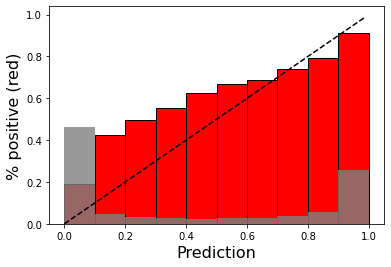

In [165]:
plt.bar(np.array(df_vte.index).round(1)+0.05, df_vte['% positive'], width=0.1, color='red', edgecolor='black')
plt.bar(np.array(df_vte.index).round(1)+0.05, df_vte['number predicted']/80000, width=0.1, color='grey', alpha=0.8)
plt.plot(np.arange(0,1,0.01), np.arange(0,1,0.01), c='black', linestyle="--")
plt.xlabel("Prediction", fontsize=16)
plt.ylabel("% positive (red)", fontsize=16)
plt.savefig("calibration_vte_other_mode.pdf", format='pdf')

### Multimodal-MAML

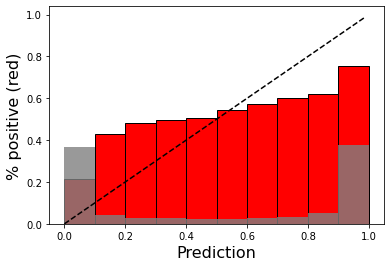

In [166]:
plt.bar(np.array(df_mm.index).round(1)+0.05, df_mm['% positive'], width=0.1, color='red', edgecolor='black')
plt.bar(np.array(df_mm.index).round(1)+0.05, df_mm['number predicted']/80000, width=0.1, color='grey', alpha=0.8)
plt.plot(np.arange(0,1,0.01), np.arange(0,1,0.01), c='black', linestyle="--")
plt.xlabel("Prediction", fontsize=16)
plt.ylabel("% positive (red)", fontsize=16)
plt.savefig("calibration_mmaml_other_mode.pdf", format='pdf')

### MAML

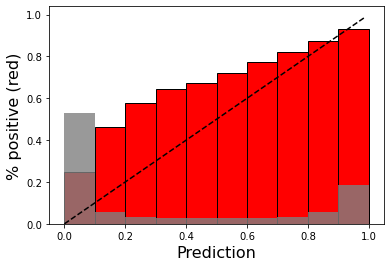

In [167]:
fig = plt.figure()
plt.bar(np.array(df_m.index).round(1)+0.05, df_m['% positive'], width=0.1, color='red', edgecolor='black')
plt.bar(np.array(df_m.index).round(1)+0.05, df_m['number predicted']/80000, width=0.1, color='grey', alpha=0.8)
plt.plot(np.arange(0,1,0.01), np.arange(0,1,0.01), c='black', linestyle="--")
plt.xlabel("Prediction", fontsize=16)
plt.ylabel("% positive (red)", fontsize=16)
plt.savefig("calibration_maml_other_mode.pdf", format='pdf')

# Embedding space

In [137]:
embeddings = None
for i in range(1000):
    with torch.no_grad():
        x_s, __, y_s, __ = testdata[0]
        embed = vte.modulation_model.transform_encoding(vte.modulation_model.encode(x_s, y_s))[0]
        if embeddings is None:
            embeddings = embed.view(1,-1)
        else:
            embeddings = torch.cat([embeddings, embed], dim=0)

In [140]:
tsne = TSNE()

In [141]:
tsne = tsne.fit_transform(embeddings)


In [142]:
list = []
for i in range(333):
    list += [1,2,3]

list.append(1)

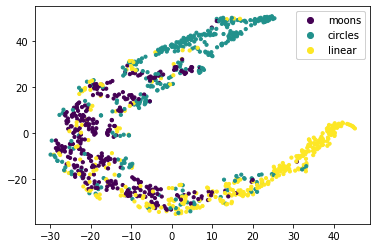

In [144]:
fig, ax = plt.subplots()
scatter = ax.scatter(tsne[:,0], tsne[:,1], c=list, s=10, alpha=1)
legend = ax.legend(scatter.legend_elements()[0], ["moons", "circles", "linear"])
ax.add_artist(legend)
plt.savefig("tsne_class.pdf", format="pdf")

# Contour Plots

In [91]:
def plot_contours(metalearner, plt, x_s, x_q, y_s, y_q):
    x_slice = slice(float(x_q[:,0].min()-0.3),float(x_q[:,0].max()+0.3),0.05)
    y_slice = slice(float(x_q[:,1].min()-0.3),float(x_q[:,1].max()+0.3),0.05)
    x_grid = torch.Tensor(np.mgrid[x_slice,y_slice]).permute(1,2,0).reshape(-1,2)

    xsize = int((x_slice.stop-x_slice.start)/x_slice.step+1)
    ysize = int((y_slice.stop-y_slice.start)/y_slice.step+1)
    preds = None
    for i in range(100):
        phi, embedding = metalearner.finetune(x_s, y_s)
        if preds is None:
            pred = metalearner.predict(x_grid, phi, embedding)
            preds = pred.view(*pred.shape,1)
        else:
            preds = torch.cat([preds, vte.predict(x_grid, phi, embedding).view(*pred.shape, 1)], dim=2)
    pred = preds.mean(dim=2)
    x_grid = x_grid.view(xsize, ysize, 2)
    plt.contourf(x_grid[:,:,0], x_grid[:,:,1], pred.view(xsize,ysize).sigmoid().detach(), cmap="RdBu", levels=20, alpha=0.3)
    plt.scatter(x_q[:,0], x_q[:,1], c=y_q, cmap="RdBu", s=25)
    plt.scatter(x_s[:,0], x_s[:,1], c=y_s, marker='^', s=200, cmap="RdBu", alpha=0.7)



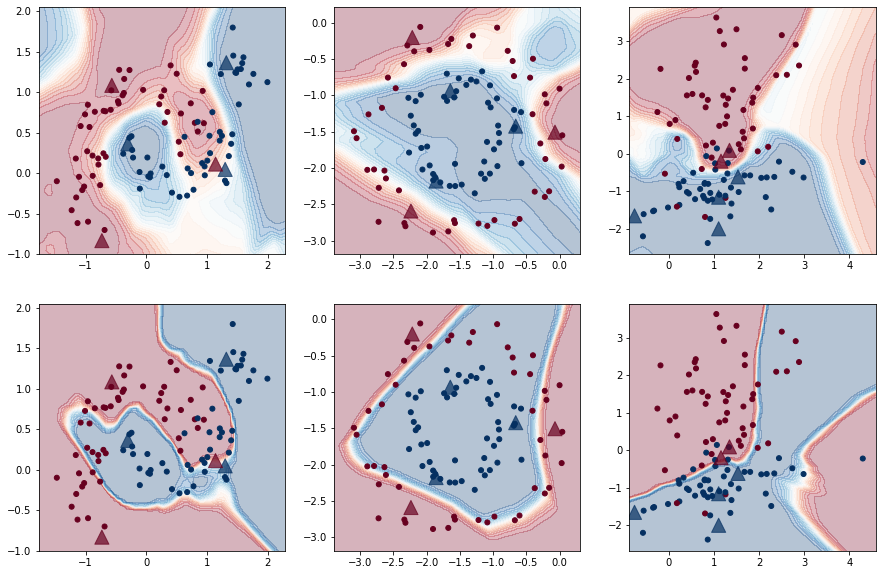

In [101]:
fig, axes = plt.subplots(2, 3, figsize=(15,10))
for i in range(3):
    x_s, x_q, y_s, y_q = testdata[0]
    plot_contours(vte, axes[0,i], x_s, x_q, y_s, y_q)
    plot_contours(mmaml, axes[1,i], x_s, x_q, y_s, y_q)

plt.show()

In [104]:
fig.savefig("contours.pdf", format='pdf', bbox_inches='tight')